In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [7]:
figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 3
lw = np.array([0, -75, -75])
up = np.array([20, 75, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x", "rotation_angle_y"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUOriginalModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [8]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.0004262469651055966


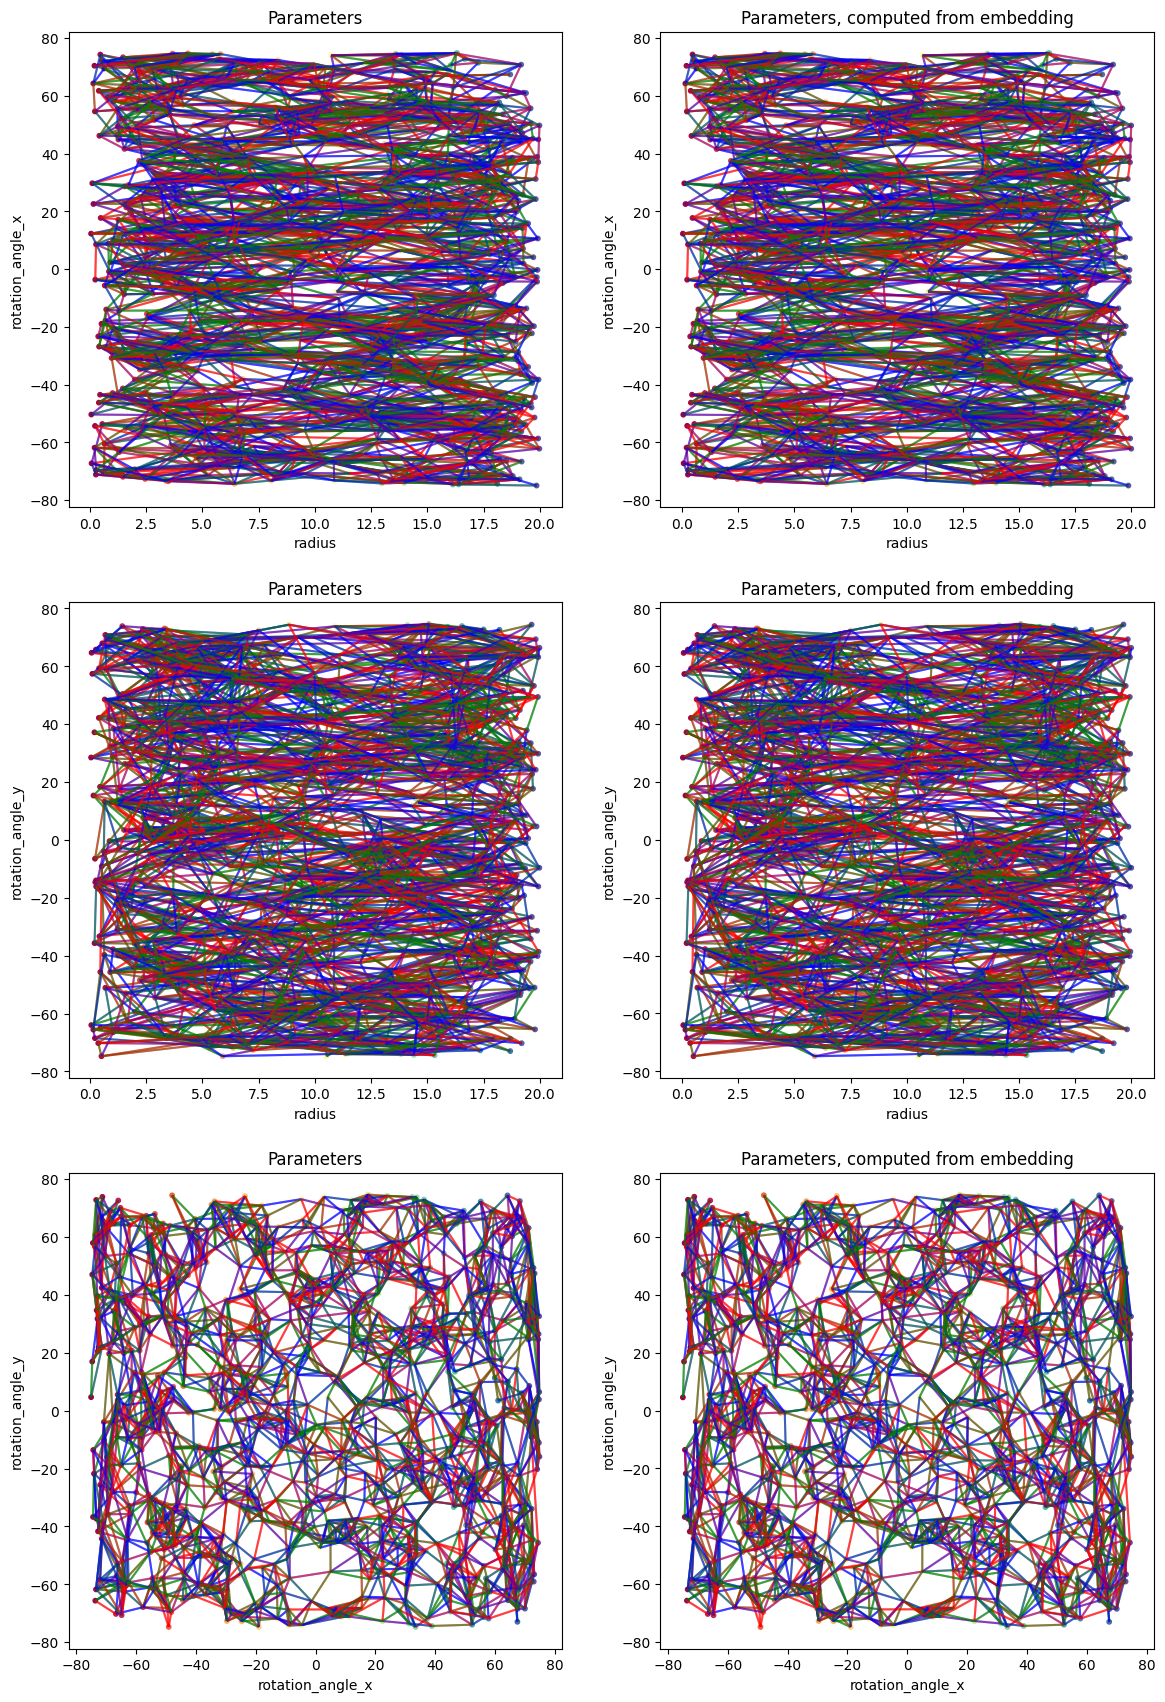

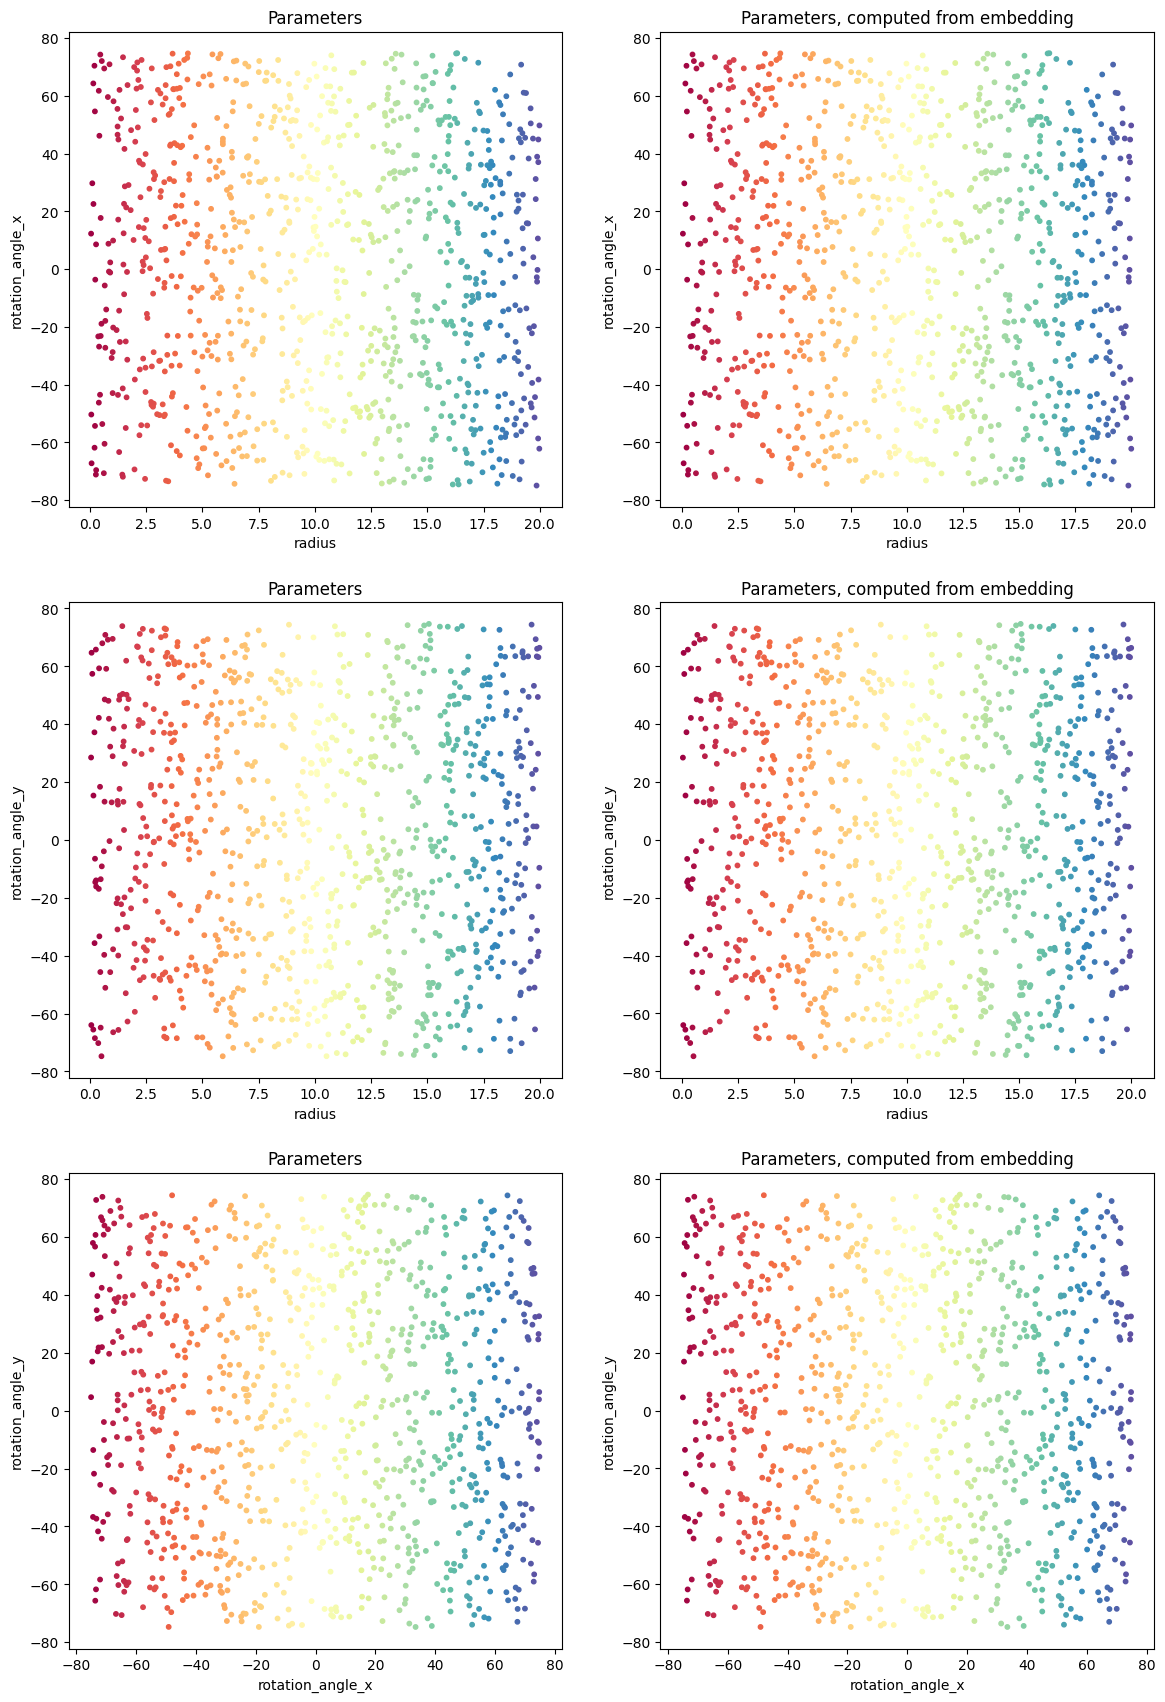

In [9]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [11]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level, pieces_cnt=5, test_data_size=20, same_value=False)

Finding neighbors: 6 ms , optimization: 0 ms
-----------
x_opt  = [  4.14711885 -63.82444785 -50.63831683], x_err = 8.08928907566222e-16
x_real = [  0.95267377 -63.45214332 -64.24745242]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  0.20469506 -50.33289143 -62.48258553], x_err = 1.88877264942791e-15
x_real = [  1.94265216 -49.10612174 -66.57173895]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  0.23031263 -49.09952138 -63.4453991 ], x_err = 4.863763045003005e-15
x_real = [  2.03085172 -48.30545848 -70.63890155]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  2.65171334 -71.30601747 -41.72333994], x_err = 1.182021474974145e-14
x_real = [  0.47588354 -67.52968125 -58.5769807 ]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_opt  = [  0.22987364 -51.02529238 -62.73259645], x_err = 1.8528414537681145e-18
x_real = [  2.75206575 -56.29132571 -63.72331265]
Finding neighbors: 5 ms , optimization: 0 ms
-----------
x_op

In [12]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level, pieces_cnt=5, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [  3.09556395 -50.54928371 -47.99324151], x_err = 0.00013173423696556213
x_real = [  2.19439998 -57.0555576  -53.66692005]
-----------
x_opt  = [  3.09556395 -50.54928371 -47.99324151], x_err = 0.00013193494562264383
x_real = [  1.61465311 -57.01200253 -51.55055149]
-----------
x_opt  = [  2.45363191 -72.61601463 -41.71655072], x_err = 0.00011767524112060397
x_real = [  1.8892693  -69.81353543 -51.32386214]
-----------
x_opt  = [  4.00066808 -64.50624739 -52.08205152], x_err = 0.0001317403043620628
x_real = [  1.9896818  -65.12849887 -59.81527534]
-----------
x_opt  = [  3.09556395 -50.54928371 -47.99324151], x_err = 0.00013257219834517879
x_real = [  0.05541001 -49.1464224  -47.03724339]
-----------
x_opt  = [  3.09556395 -50.54928371 -47.99324151], x_err = 0.0001295035332675612
x_real = [  3.15396971 -50.37011097 -56.67720869]
-----------
x_opt  = [  3.69058054 -42.93188429 -64.08060123], x_err = 0.0001285476880783355
x_real = [  2.66537643 -48.26235683 -60.78485

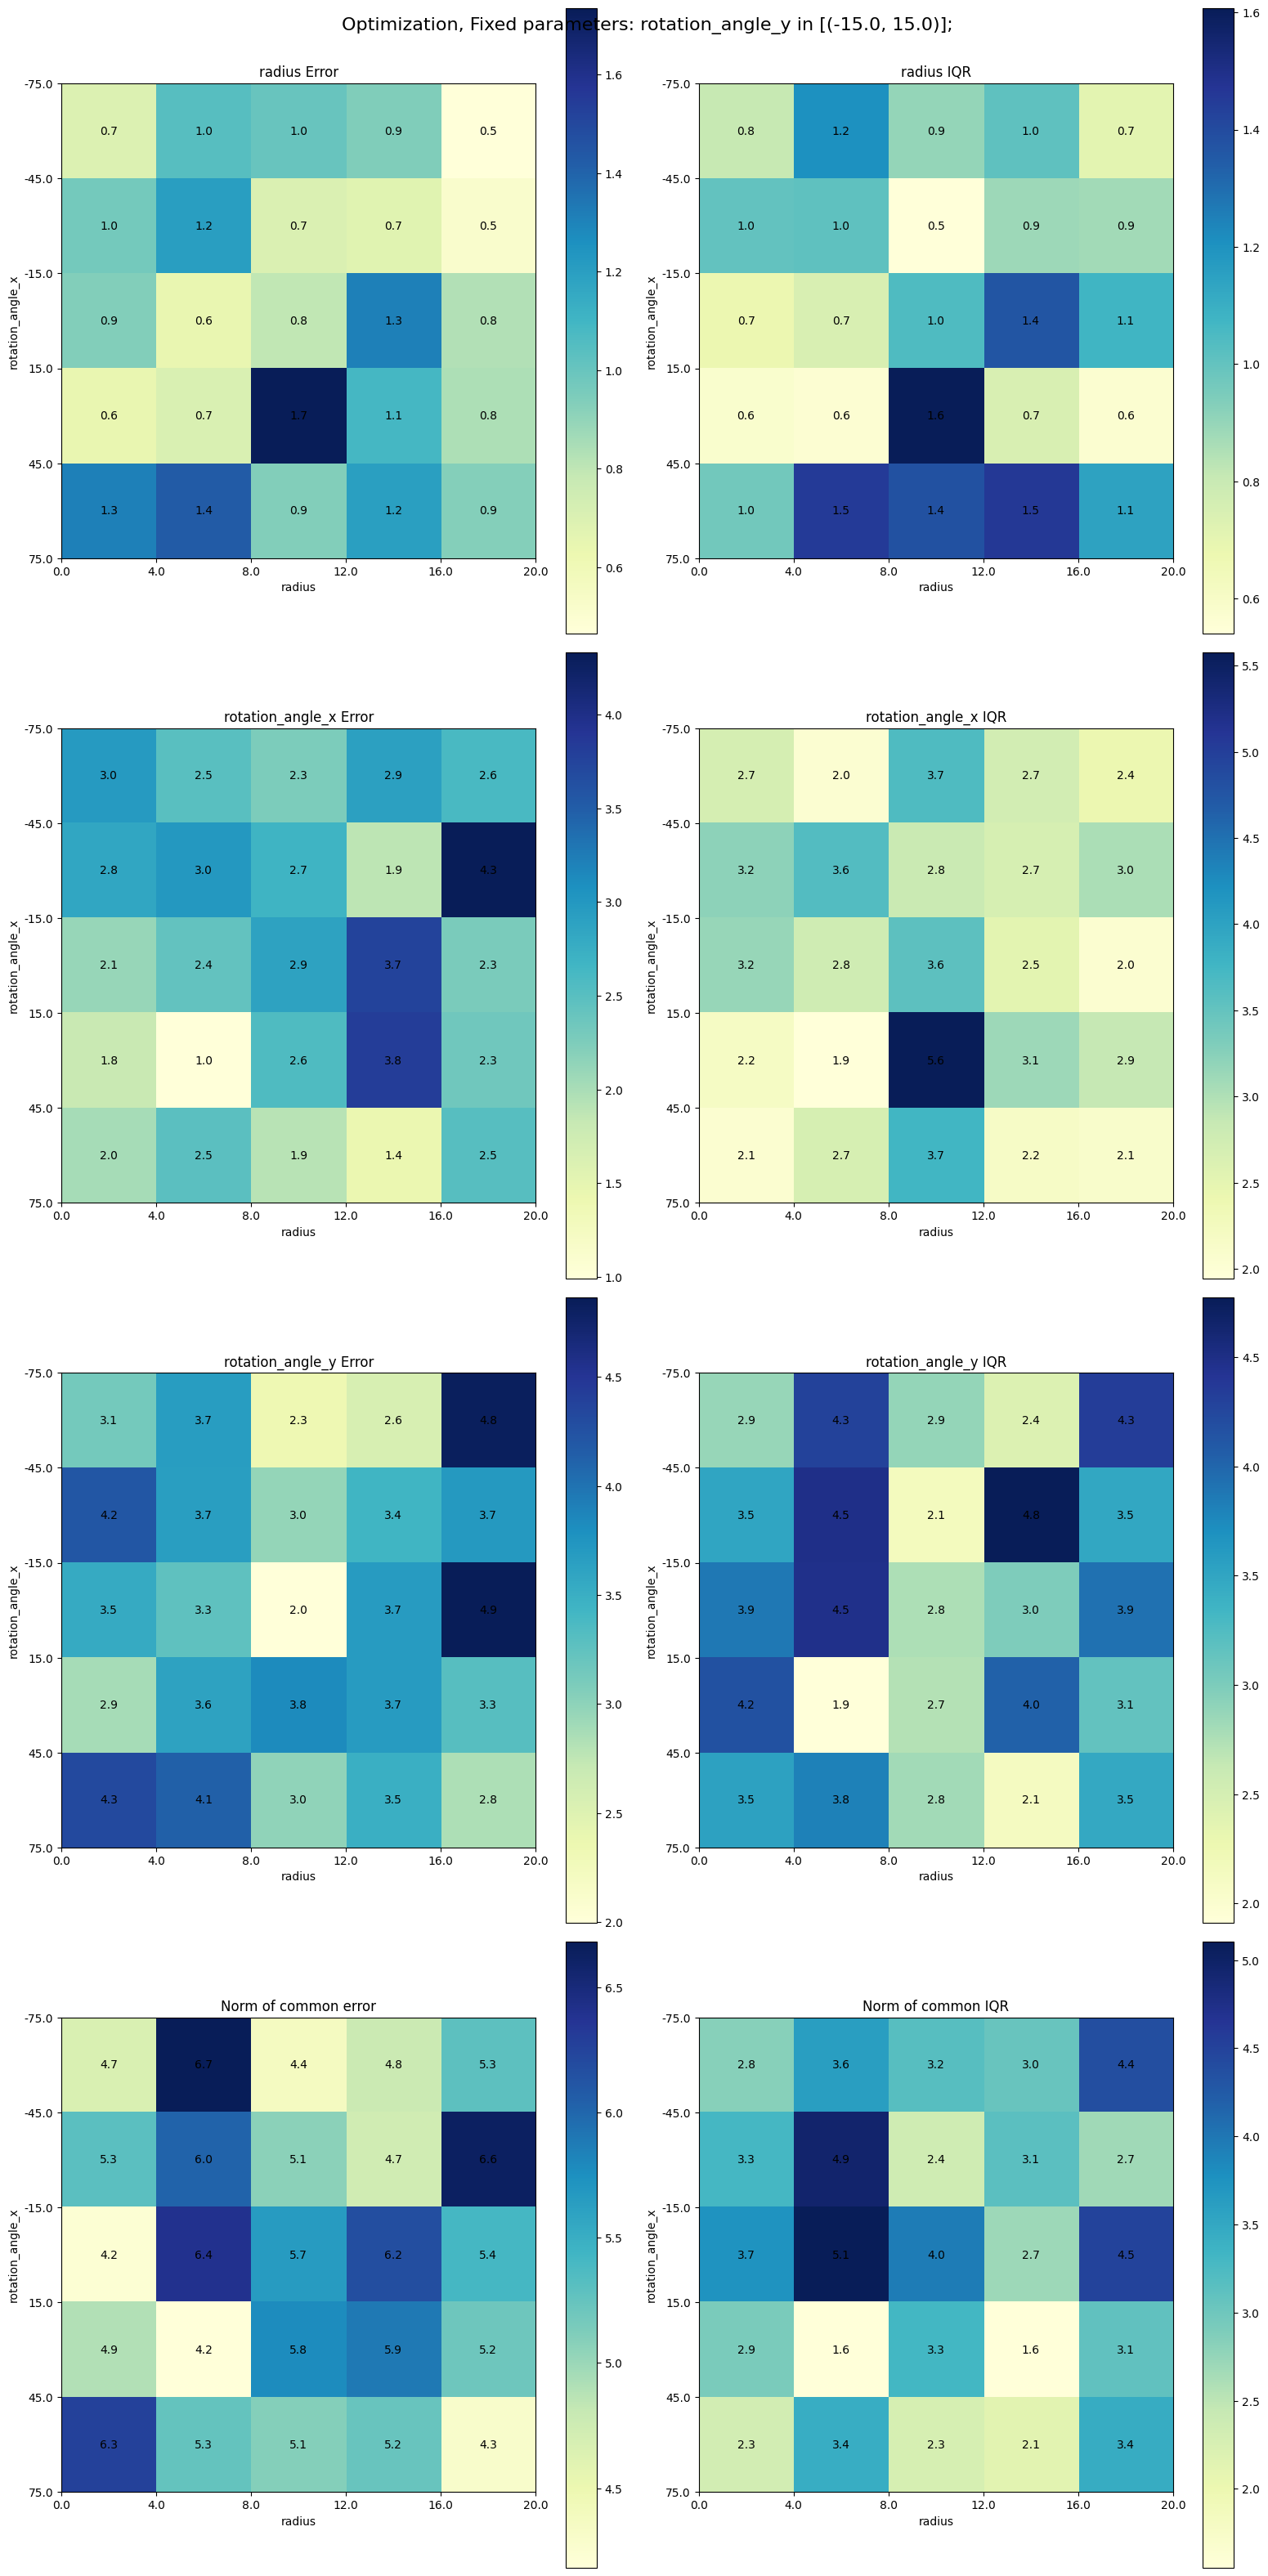

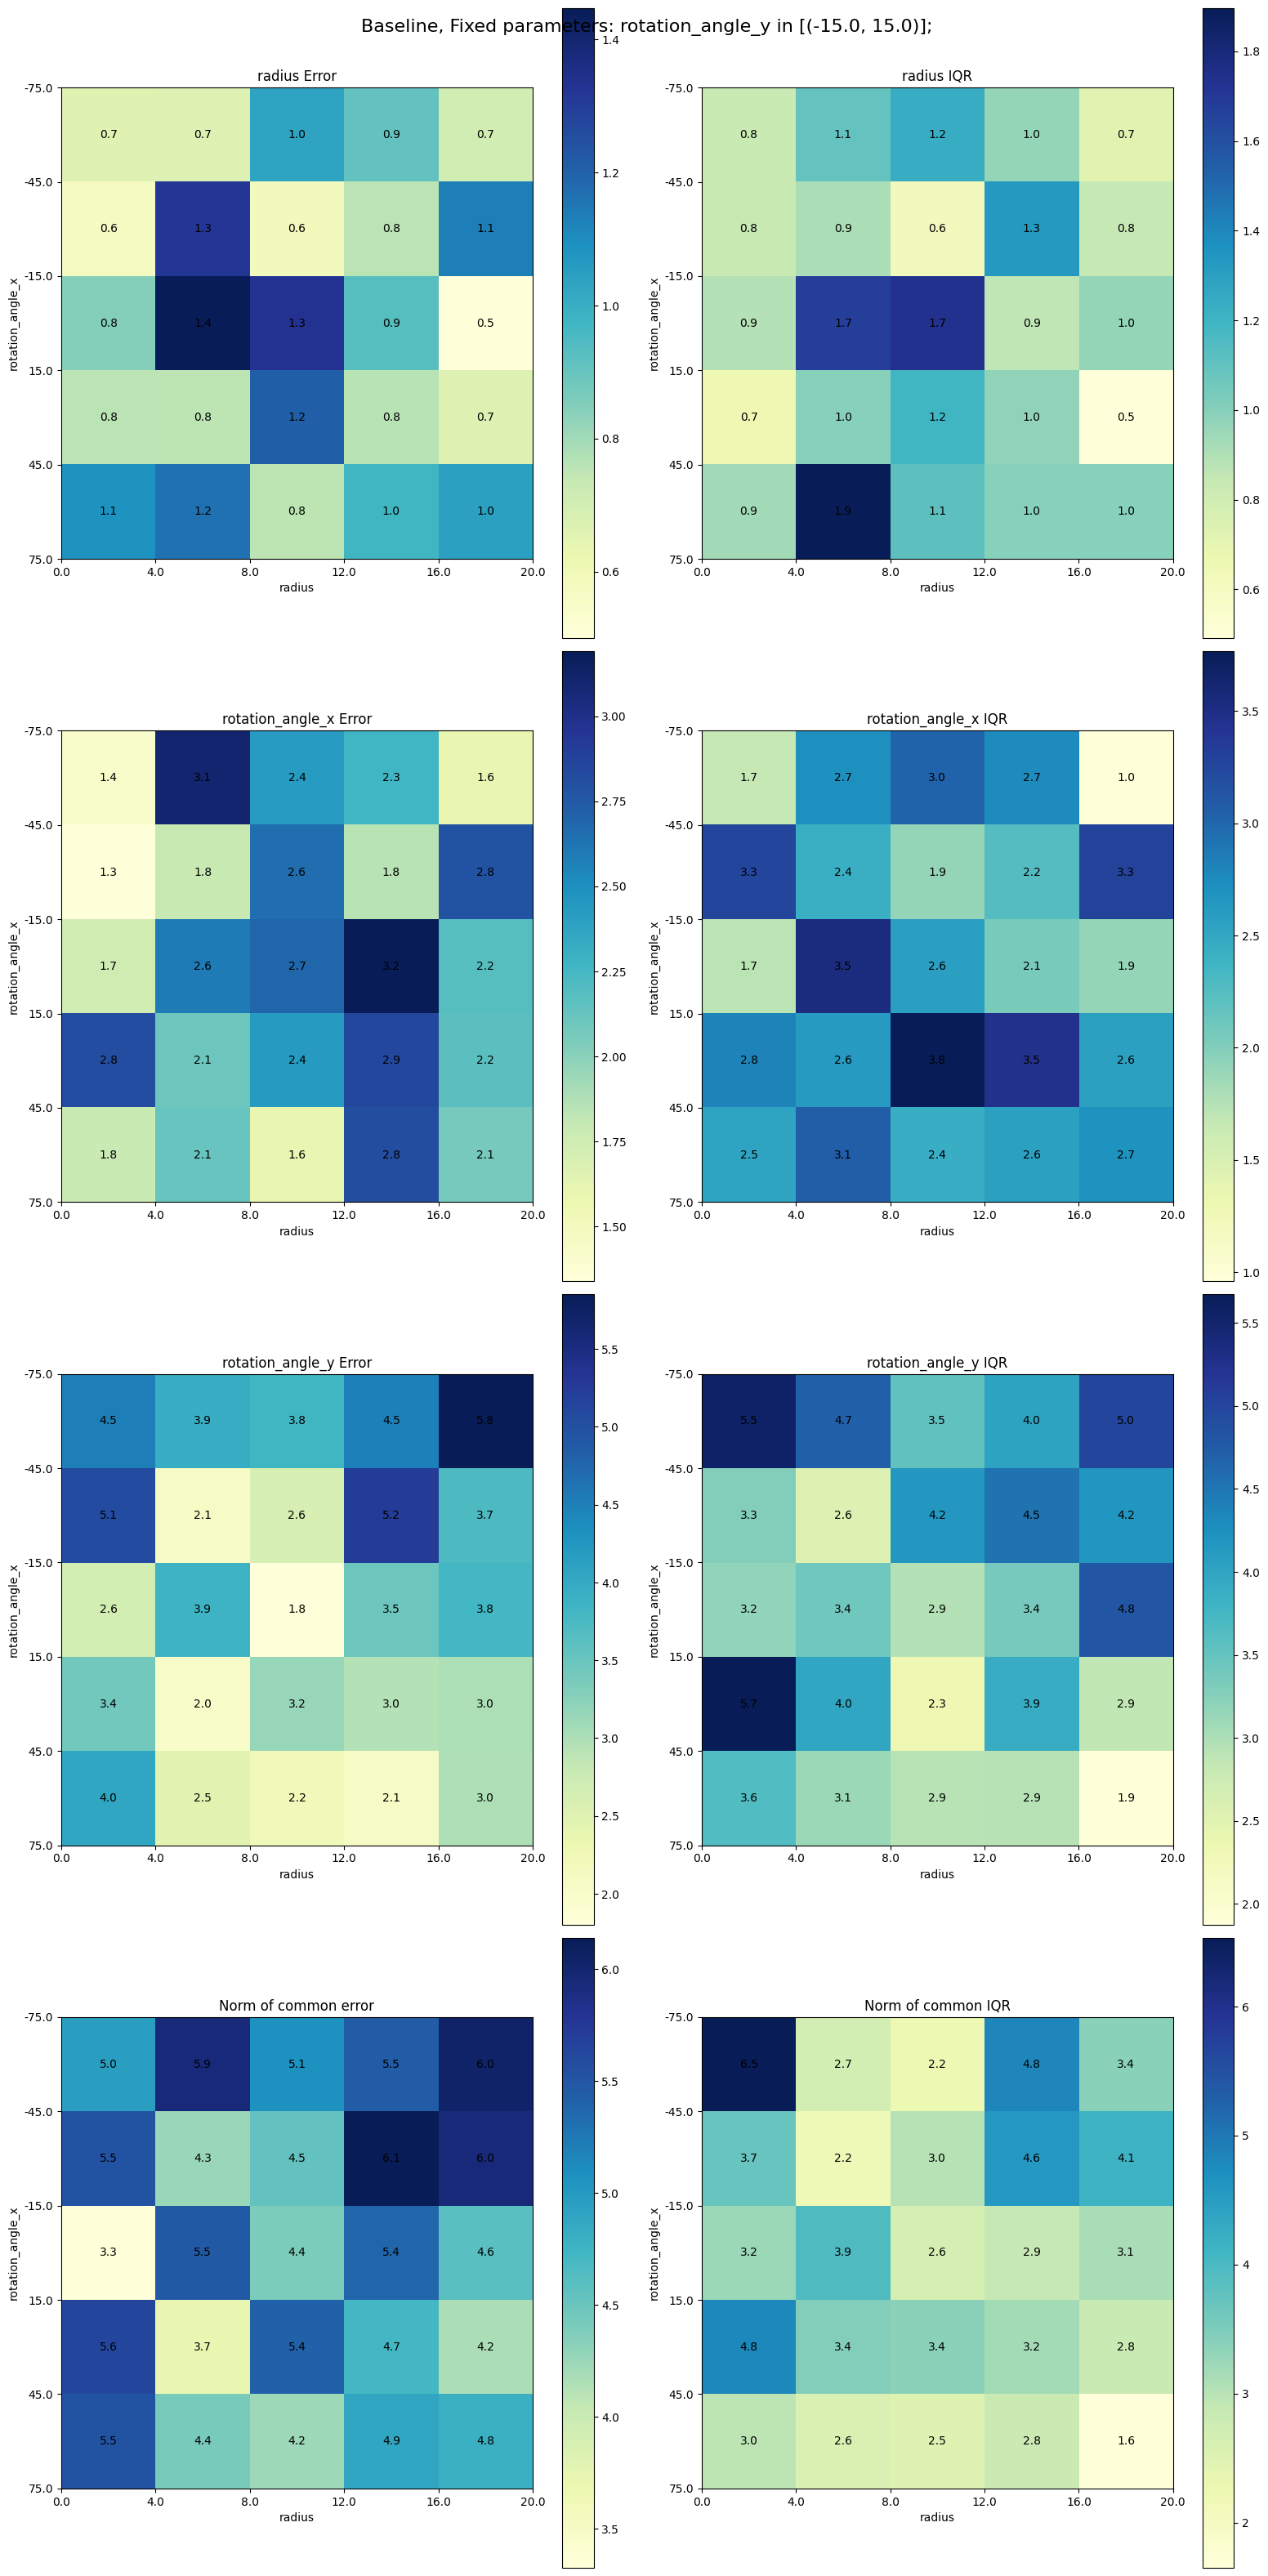

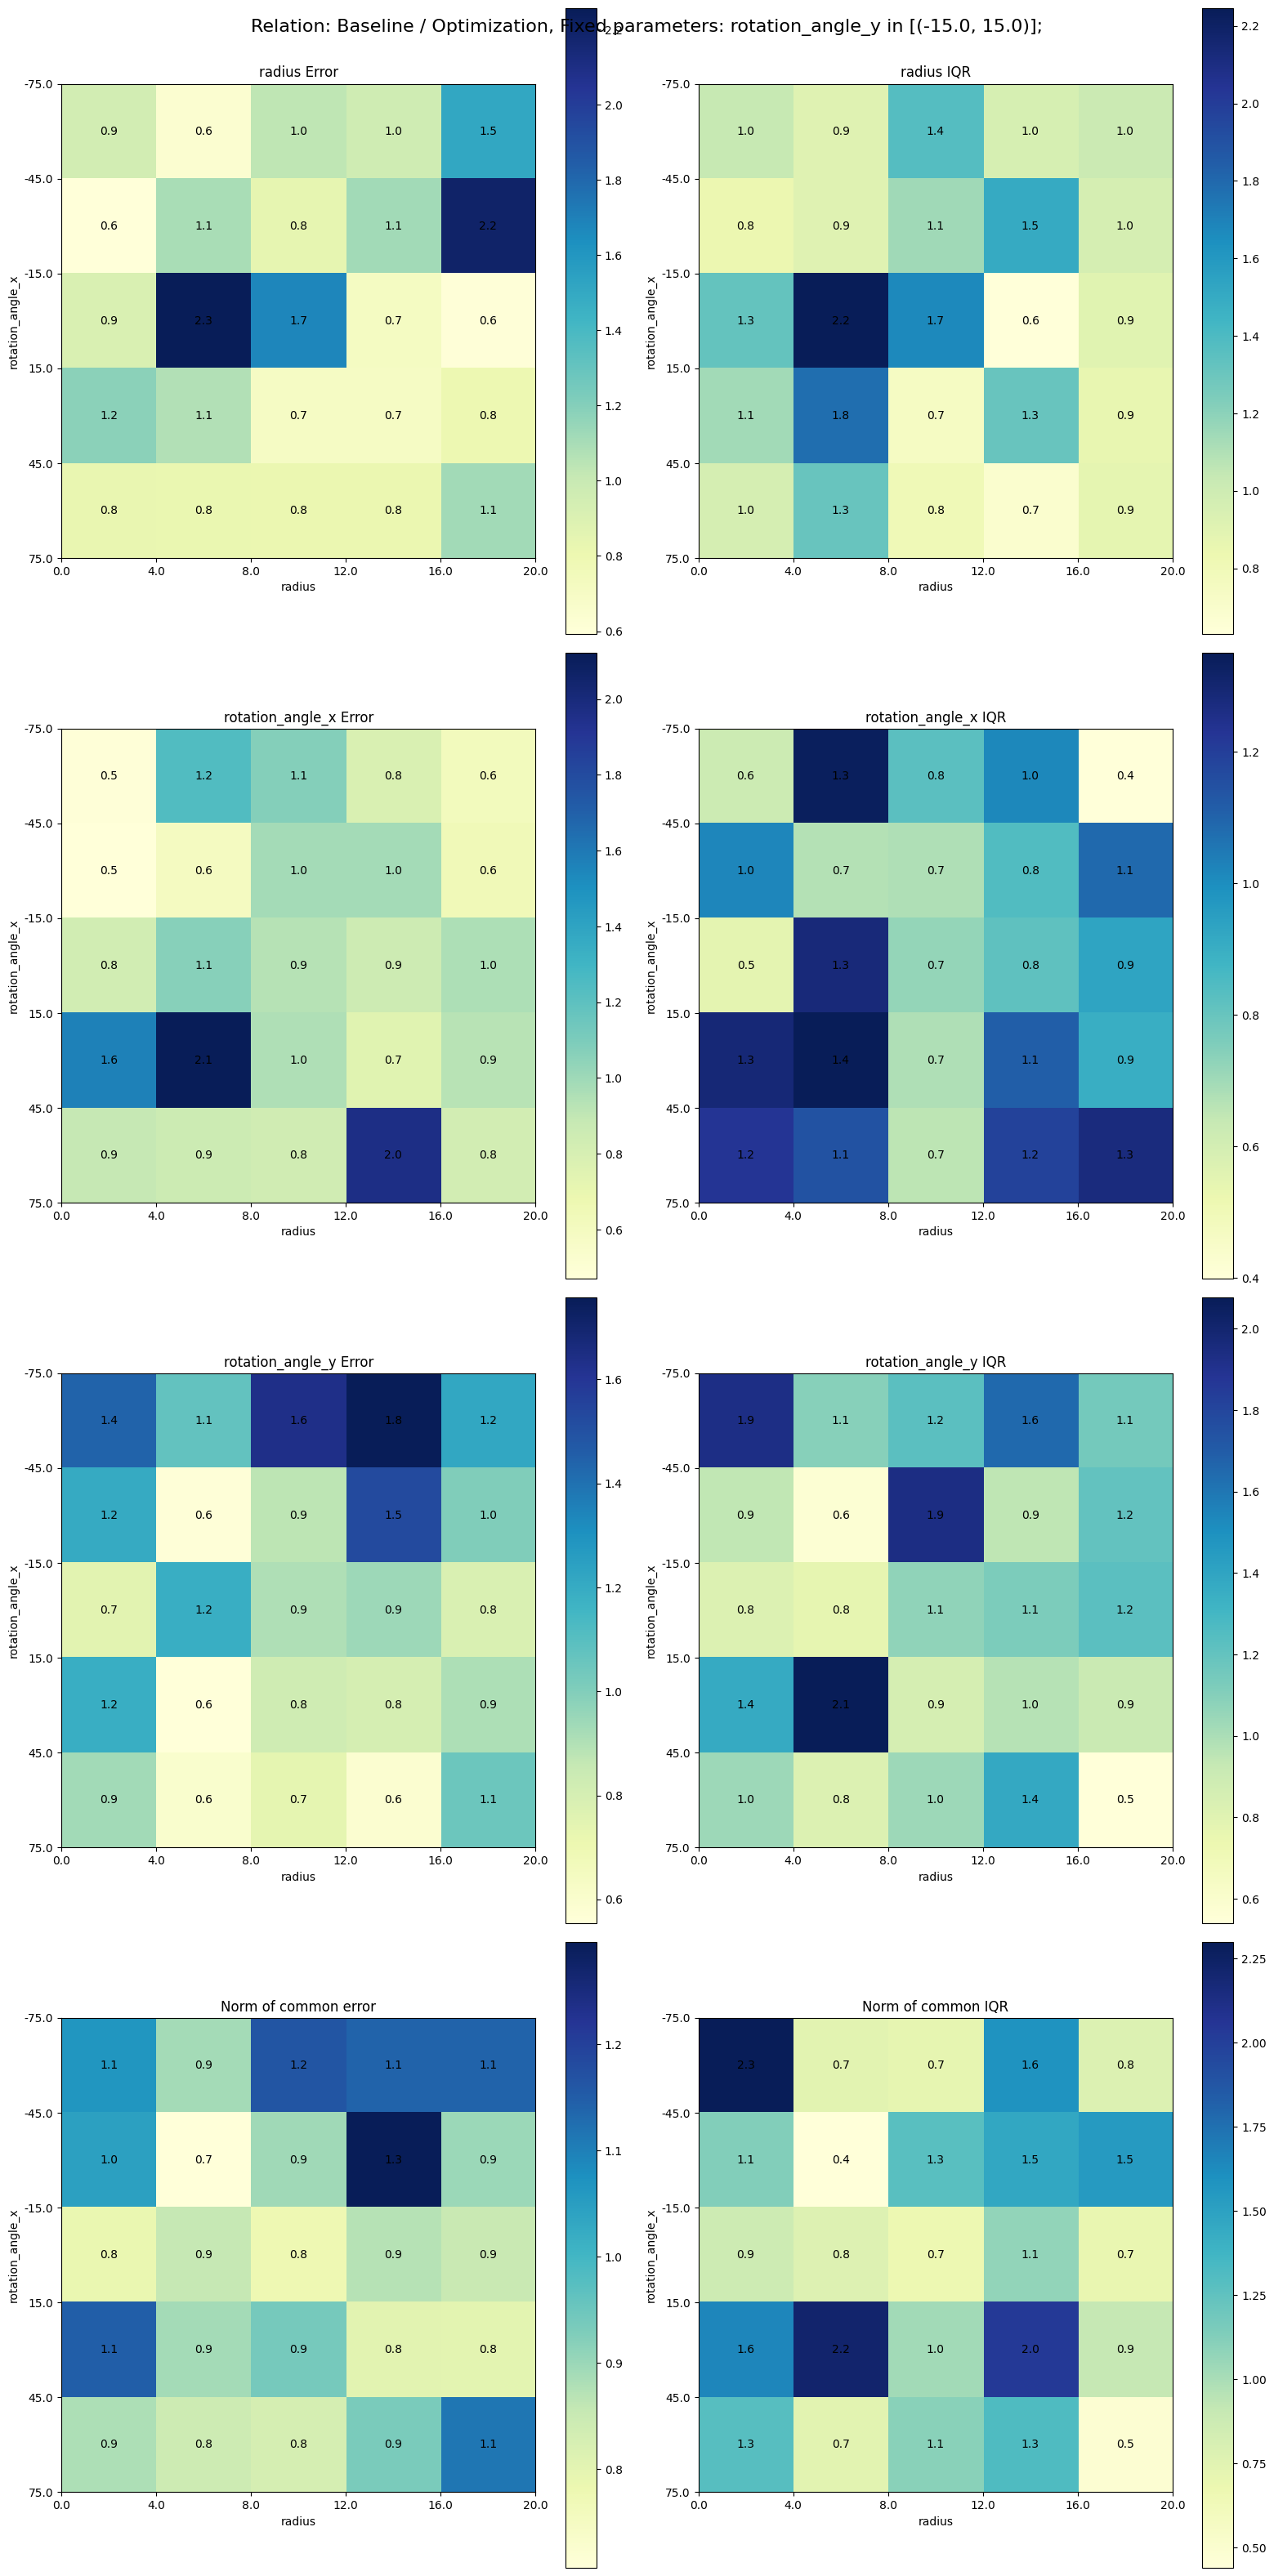

In [18]:
fixed_params_map={2:2}
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map=fixed_params_map, filename = f"images/orig_cyl_3d_{fixed_params_map}.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, fixed_params_map=fixed_params_map, filename = f"images/orig_cyl_3d_{fixed_params_map}_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, fixed_params_map=fixed_params_map, filename = f"images/orig_cyl_3d_{fixed_params_map}_rel.png", title="Relation: Baseline / Optimization")

0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


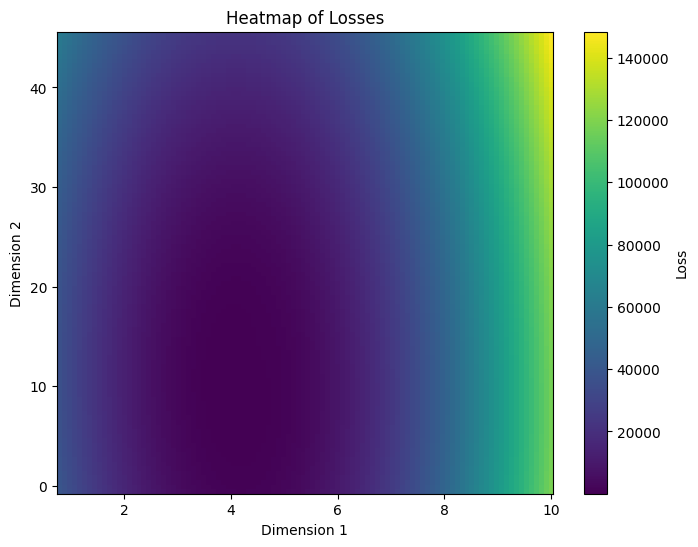

Finding neighbors: 1 ms , optimization: 174 ms
x_opt = [ 2.9669667  15.05992615], x_err = 0.0016747617510351393
x_real = [ 3 15]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


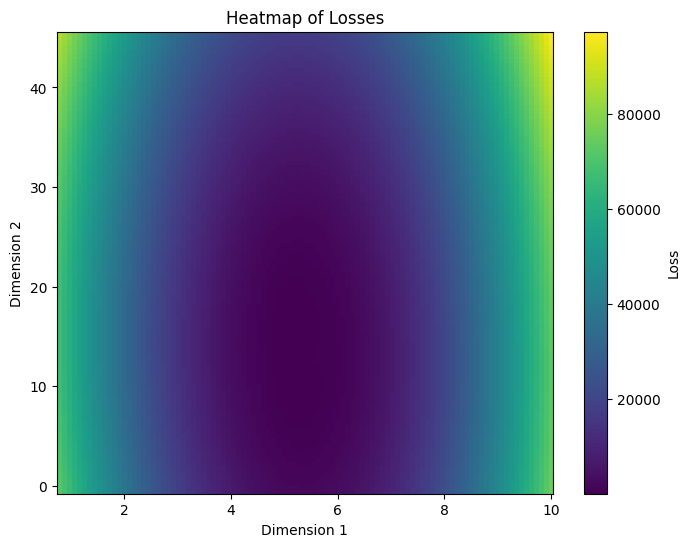

Finding neighbors: 1 ms , optimization: 165 ms
x_opt = [ 3.97055555 20.93389037], x_err = 0.12318884038920398
x_real = [ 4 21]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


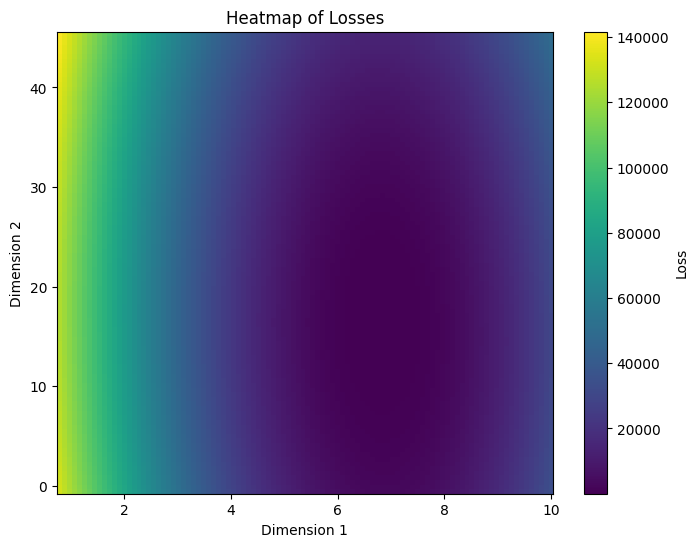

Finding neighbors: 1 ms , optimization: 171 ms
x_opt = [ 5.0304985  29.65335566], x_err = 0.002942246498999094
x_real = [ 5 30]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


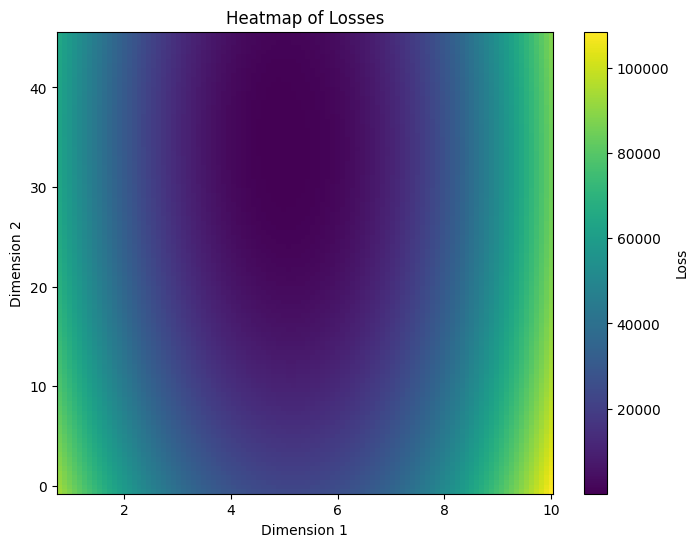

Finding neighbors: 2 ms , optimization: 178 ms
x_opt = [ 7.95552904 19.95612064], x_err = 0.0012933797328596426
x_real = [ 8 20]


In [100]:
test_control_vars = np.array([[3, 15], [4, 21], [5, 30], [8, 20]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")